In [2]:
import numpy as np
import scipy
from scipy.io import loadmat, savemat
from sklearn.linear_model import LinearRegression
import os
from sklearn.utils import resample

In [3]:
###Randomness from Bootstrapping

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def bootstrap_reg(model,x_train,y_train,x_test,y_test, times = 100):
    '''
    Perform bootstrapping, store results for further analysis and visualization
    :param x_train: training set X
    :param y_train: training set Y
    :param x_test: testing set X
    :param y_test: testing set Y
    :param featrue_eng: feature engineering method list to pass in feature engineering function
    :param times: how many times to bootstrap
    :return: dictionary of metrics, dict['<metric name>'] = [<values, length = fold>]
    '''
    mae_results = []
    rmse_results =[]
    r2_results = []
    pearson_results = []
    spearman_results =[]
    index = np.arange(x_train.shape[0])
    for i in range(times):
        boot_index = resample(index, replace=True, n_samples=None, random_state=9001+i)
        x_boot, y_boot = x_train[boot_index], y_train[boot_index]
        model.fit(x_boot,y_boot)
        y_true = y_test.reshape(-1,)
        y_preds = model.predict(x_test).reshape(-1,)
        
        mae = mean_absolute_error(y_true, y_preds)
        rmse = np.sqrt(mean_squared_error(y_true, y_preds))
        r2 = r2_score(y_true, y_preds)
        p_cor, p_p = pearsonr(y_true,y_preds)
        sp_cor, sp_p = spearmanr(y_true, y_preds)
        mae_results.append(mae)
        rmse_results.append(rmse)
        r2_results.append(r2)
        pearson_results.append(p_cor)
        spearman_results.append(sp_cor)
    
    #MAE
    mae_arr = np.array(mae_results)
    mean_mae = np.mean(mae_arr, axis=0)
    mae_arr_sorted = np.sort(mae_arr, axis=0)
    ci_low = mae_arr_sorted[round(0.025 * times)]
    ci_high = mae_arr_sorted[round(0.975 * times)]
    mae_result = {'result': mae_arr, 'mean': mean_mae, 'CI': [ci_low, ci_high]}
    

    # RMSE
    rmse_arr = np.array(rmse_results)
    mean_rmse = np.mean(rmse_arr, axis=0)
    rmse_arr_sorted = np.sort(rmse_arr, axis=0)
    ci_low = rmse_arr_sorted[round(0.025 * times)]
    ci_high = rmse_arr_sorted[round(0.975 * times)]
    rmse_result = {'result': rmse_arr, 'mean': mean_rmse, 'CI': [ci_low, ci_high]}

    # R2
    r2_arr = np.array(r2_results)
    mean_r2 = np.mean(r2_arr, axis=0)
    r2_arr_sorted = np.sort(r2_arr, axis=0)
    ci_low = r2_arr_sorted[round(0.025 * times)]
    ci_high = r2_arr_sorted[round(0.975 * times)]
    r2_result = {'result': r2_arr, 'mean': mean_r2, 'CI': [ci_low, ci_high]}

    # PR
    pearson_arr = np.array(pearson_results)
    mean_pearson = np.mean(pearson_arr, axis=0)
    pearson_arr_sorted = np.sort(pearson_arr, axis=0)
    ci_low = pearson_arr_sorted[round(0.025 * times)]
    ci_high = pearson_arr_sorted[round(0.975 * times)]
    pearson_result = {'result': pearson_arr, 'mean': mean_pearson, 'CI': [ci_low, ci_high]}

    # SR
    spearman_arr = np.array(spearman_results)
    mean_spearman = np.mean(spearman_arr, axis=0)
    spearman_arr_sorted = np.sort(spearman_arr, axis=0)
    ci_low = spearman_arr_sorted[round(0.025 * times)]
    ci_high = spearman_arr_sorted[round(0.975 * times)]
    #print(ci_low)
    #print(ci_low)
    spearman_result = {'result': spearman_arr, 'mean': mean_spearman, 'CI': [ci_low, ci_high]}
    
    boot_result = {'mae_result': mae_result, 'rmse_result': rmse_result,'r2_result': r2_result, 'pearson_result': pearson_result,'spearman_result': spearman_result}
    return boot_result

def _returnRow(list):
    return ';'.join([str(i) for i in list])

# Print results
def fillTable(boot_result, digit = 4):
    i=0
    one_row = [str(round(boot_result['mae_result']['mean'],digit)),
               '['+str(round(boot_result['mae_result']['CI'][0],digit))+','+str(round(boot_result['mae_result']['CI'][1],digit))+']',
               str(round(boot_result['rmse_result']['mean'],digit)),
               '['+str(round(boot_result['rmse_result']['CI'][0],digit))+','+str(round(boot_result['rmse_result']['CI'][1],digit))+']',
               str(round(boot_result['r2_result']['mean'],digit)),
               '['+str(round(boot_result['r2_result']['CI'][0],digit))+','+str(round(boot_result['r2_result']['CI'][1],digit))+']',
               str(round(boot_result['pearson_result']['mean'],digit)),
               '['+str(round(boot_result['pearson_result']['CI'][0],digit))+','+str(round(boot_result['pearson_result']['CI'][1],digit))+']',
                str(round(boot_result['spearman_result']['mean'],digit)),
               '['+str(round(boot_result['spearman_result']['CI'][0],digit))+','+str(round(boot_result['spearman_result']['CI'][1],digit))+']']
    print(_returnRow(one_row))

def saveresult(boot_result,file):
    np.save(file+'mae.npy',boot_result['mae_result']['result'])
    np.save(file+'rmse.npy',boot_result['rmse_result']['result'])
    np.save(file+'r2.npy',boot_result['r2_result']['result'])
    np.save(file+'pearson.npy',boot_result['pearson_result']['result'])
    np.save(file+'spearman.npy',boot_result['spearman_result']['result'])

In [ ]:
###---Distribution visualization---###

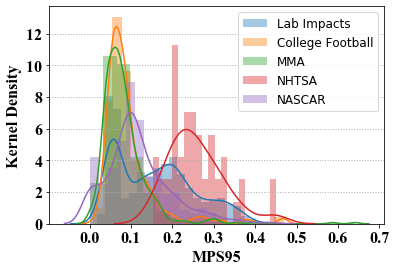

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('G:\\My Drive\\Paper\\MPS Regression\\Data\\Reg Y')
dataset1_MPS95 = np.load('Lab impact_MPS95.npy')
dataset2_MPS95 = np.load('CF_MPS95.npy')
dataset3_MPS95 = np.load('MMA_MPS95.npy')
dataset4_MPS95 = np.load('NHTSA_MPS95.npy')
dataset5_MPS95 = np.load('NASCAR_MPS95.npy')

plt.clf()
sns.distplot(dataset1_MPS95,hist=True,kde=True,norm_hist=True,bins=20)
sns.distplot(dataset2_MPS95,hist=True,kde=True,norm_hist=True,bins=20)
sns.distplot(dataset3_MPS95,hist=True,kde=True,norm_hist=True,bins=20)
sns.distplot(dataset4_MPS95,hist=True,kde=True,norm_hist=True,bins=20)
sns.distplot(dataset5_MPS95,hist=True,kde=True,norm_hist=True,bins=20)

plt.yticks(fontproperties = 'Times New Roman', size = 16)
plt.xticks(fontproperties = 'Times New Roman', size = 16)
plt.xlabel('MPS95', fontproperties = 'Times New Roman', size = 16)
plt.ylabel('Kernel Density',fontproperties = 'Times New Roman', size = 16)
plt.grid(which='major',axis='y',linestyle=':', linewidth=1)
plt.rc('axes', axisbelow=True)
plt.legend(['Lab Impacts','College Football','MMA','NHTSA','NASCAR'],fontsize='large')

In [ ]:
###---Cross-dataset prediction---###

In [16]:
#Dataset 4 -> Dataset 5, bootstrapping; MPS95
from sklearn.model_selection import train_test_split
#Load Y
os.chdir('.\\Data')
NHTSA_MPS95 = np.load('NHTSA_MPS95.npy')
NASCAR_MPS95 = np.load('NASCAR_MPS95.npy')
#Load X
metrics  = ['BAM','BrIC','CP','GAMBIT','HIC','HIP','PRHIC','RIC','SI','PCS','lin_acc_CG_max','ang_vel_max','ang_acc_max','Damage_C','RVCI','KLC','BRIC','CIBIC']
for metric in metrics:
    NHTSA_metric = loadmat('NHTSA_BIC.mat')['BIC'][metric].astype(np.double)
    NASCAR_metric = loadmat('NASCAR_BIC.mat')['BIC'][metric].astype(np.double)
    
    y_train= NHTSA_MPS95
    y_test = NASCAR_MPS95
    x_train = NHTSA_metric
    x_test = NASCAR_metric
    
    lr = LinearRegression()
    boot_result = bootstrap_reg(lr,x_train,y_train,x_test,y_test, times = 100)
    fillTable(boot_result,digit = 4)

0.1214;[0.1115,0.1295];0.1317;[0.1238,0.1402];-1.887;[-2.208,-1.4966];0.7428;[0.7428,0.7428];0.7375;[0.7375,0.7375]
0.0534;[0.0391,0.083];0.068;[0.0559,0.0961];0.2124;[-0.4743,0.4838];0.736;[0.736,0.736];0.7851;[0.7851,0.7851]
0.1311;[0.1209,0.142];0.1431;[0.1334,0.1536];-2.4081;[-2.8606,-1.9424];0.6173;[0.6173,0.6173];0.7675;[0.7675,0.7675]
0.1212;[0.1086,0.1356];0.1307;[0.1182,0.145];-1.8457;[-2.4421,-1.3173];0.7489;[0.7489,0.7489];0.7566;[0.7566,0.7566]
0.1327;[0.1185,0.1469];0.1543;[0.1395,0.1819];-2.9702;[-3.9018,-2.1611];0.5977;[0.5977,0.5977];0.6649;[0.6649,0.6649]
0.1111;[0.0943,0.1307];0.1239;[0.1074,0.1434];-1.5645;[-2.315,-0.8542];0.6434;[0.6434,0.6434];0.654;[0.654,0.654]
0.1224;[0.1034,0.1436];0.1434;[0.1297,0.1604];-2.4272;[-3.2104,-1.7799];0.2902;[0.2902,0.2902];0.7926;[0.7926,0.7926]
0.0992;[0.0878,0.1109];0.1113;[0.1008,0.1223];-1.0635;[-1.4824,-0.6752];0.7593;[0.7593,0.7593];0.8182;[0.8182,0.8182]
0.1077;[0.0941,0.1249];0.1239;[0.1113,0.138];-1.5585;[-2.138,-1.0355];0

In [ ]:
###---Similar Codes for other cross-dataset tasks---###